In [1]:
import pyforest
import scipy.stats as st

In [4]:
# tossing of coin three times, find the probobilities.
n = 3
p = 0.5
x = np.arange(0,4)

<IPython.core.display.Javascript object>

In [5]:
pmf = st.binom.pmf(x, n, p)
pmf

array([0.125, 0.375, 0.375, 0.125])

<IPython.core.display.Javascript object>

<BarContainer object of 4 artists>

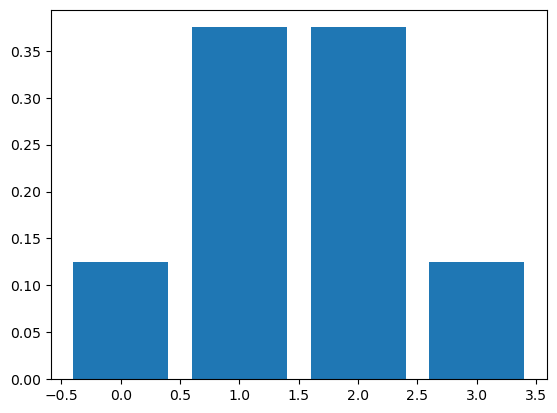

In [9]:
plt.bar(x, pmf) # Probability Mass Function bar chart

<IPython.core.display.Javascript object>

<BarContainer object of 4 artists>

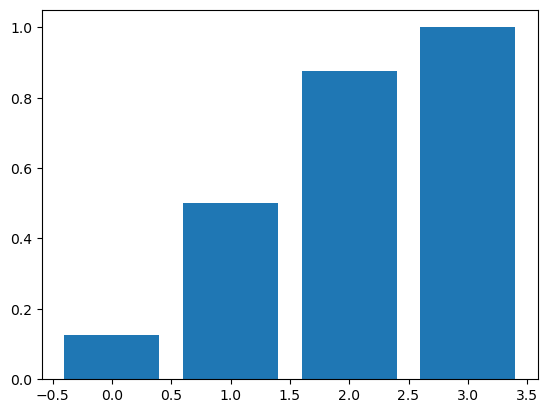

In [11]:
cp = st.binom.cdf(x, n , p)
plt.bar(x, cp) # Continuos Distribution Function bar chart

<IPython.core.display.Javascript object>

<BarContainer object of 4 artists>

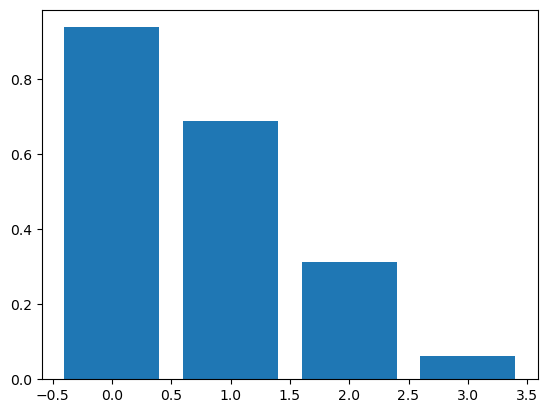

In [17]:
plt.bar(x, st.binom.sf(x - 1, n, p))

In a textile shop for every 25 customers 10 customers buy the product. on one day there are 40 customers visited the store what is the probability that ?
1. all 40 customers bu the product ?
2. none of the customers buy the product ?
3. at least 15 customers buy the product ?
4. Atmost 15 customers buy the product ?
5. exactly 20 customers buy the product ?


In [18]:
n = 40 # no of customers
p = 10/25 # the success rate given for 25 customers is 10.


In [21]:
# 1 P(X=40) = ?
print(st.binom.pmf(40, n, p))
# 2 P(X=0) = ?
print(st.binom.pmf(0, n, p))

1.2089258196146318e-16
1.3367494538843715e-09


In [23]:
# 3. P(X>=15) = ?
x = np.arange(15,41)
print(st.binom.pmf(x, n, p).sum()) 
print(st.binom.sf(14, n, p))

<IPython.core.display.Javascript object>

0.6825748397609652
0.682574839760966


In [25]:
# 4. P(X<=15) = ?
st.binom.cdf(15, n, p)

0.44022022364846136

In [29]:
print(st.binom.sf(14, n, p) + st.binom.cdf(15, n, p)) # we do get more than 1 because we are including 15 two times.
print(st.binom.sf(15, n, p) + st.binom.cdf(15, n, p)) # sum of survival and cumulative Distribution at any point is always equal to 1

1.1227950634094275
1.0


#### Probability methods of statistics on Data Distributions (Normal, Binomial, Poisson)
1. pmf -> is used to find the probability at given point
2. cdf -> is used to find the probability upto a given point like less than , atmost of any point.
3. sf -> is used to find the probability all the points from a given point like greater than , atleast of any point.
4. ppf -> Inverse of CDF
5. -> Inverse of SF

In [26]:
# 5. P(X=20) = ?
st.binom.pmf(20, n,p)

0.055414149064988975

In [31]:
st.binom.stats(3, 0.5) # it returns two values i.e Expected Value (E(X)) and Variance V(X)

(1.5, 0.75)

### Date - 09/06/2024

##### The Data scientist salary follows normal distribution with a mean salary of 600k and standard deviation of 90k. find the probability the a data scientist salary lies
1. more than 700k ?
2. less than 800k ?
3. in between 510k and 690k ?
4. in between 420k and 780k ?
5. in between 330k and 870k ?

In [6]:
mean_salary = 600000 # i.e mu
standard_deviation = 90000 # i.e sigma

# 1. more than 700k -> P(X > 700k)
print(st.norm.sf(700000, mean_salary, standard_deviation))
# 2. P(X<800k)
print(st.norm.cdf(800000, mean_salary, standard_deviation))
# 3. P(510k <= X <= 690k)=? mu +- 1 sigma
print( st.norm.cdf(690000, mean_salary, standard_deviation) - st.norm.cdf(510000, mean_salary, standard_deviation))
print( st.norm.sf(510000, mean_salary, standard_deviation) - st.norm.sf(690000, mean_salary, standard_deviation))
print( 1- (st.norm.cdf(510000, mean_salary, standard_deviation) + st.norm.sf(690000, mean_salary, standard_deviation)))

0.13326026290250537
0.9868658543089789
0.6826894921370859
0.6826894921370859
0.6826894921370859


In [8]:
# 4. P(420k <= X <= 780k)=? mu +- 2 sigma
print( st.norm.cdf(780000, mean_salary, standard_deviation) - st.norm.cdf(420000, mean_salary, standard_deviation))
# 5. P(330k <= X <= 870k)=? mu +- 3 sigma
print( st.norm.sf(330000, mean_salary, standard_deviation) - st.norm.sf(870000, mean_salary, standard_deviation))


0.9544997361036416
0.9973002039367398


In [10]:
print(st.norm.cdf(1) - st.norm.cdf(-1, 0,1) ) # if we don't give  mu and sigma it considers it as standard normal distribuiton
print(st.norm.cdf(1) - st.norm.cdf(-1)) #  mu +- 1 sigma
print(st.norm.cdf(2) - st.norm.cdf(-2)) #  mu +- 2 sigma
print(st.norm.cdf(3) - st.norm.cdf(-3)) #  mu +- 3 sigma

0.6826894921370859
0.6826894921370859
0.9544997361036416
0.9973002039367398


<IPython.core.display.Javascript object>

c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

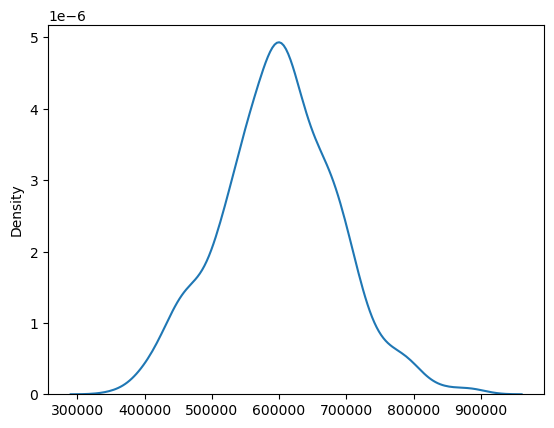

In [12]:
x = st.norm.rvs(mean_salary, standard_deviation, 1000)
sns.kdeplot(x)

In [13]:
# What is the minimum salary 80% of data scientists are getting
# here we have the sf value i.e 80% , but we need to find the x value. to find it we can use inverse of survival function
st.norm.isf(0.8, mean_salary, standard_deviation)

524254.0889784377

In [15]:
# What is the max salary of 70% of ds gets ?
# here we have to use the inverse of cdf which is ppf (point percentile function)
st.norm.ppf(0.7, mean_salary, standard_deviation)

647196.0461437237